In [1]:
## import required packages
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('practice.csv')
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn
3,70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av


###### 1.	Display all columns

In [3]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual',
       'BsmtExposure'],
      dtype='object')

###### 2.	create numerical and categorical columns list

In [4]:
numerical_cols  = df.select_dtypes(np.number).columns
categorical_cols  = df.select_dtypes(np.object).columns
numerical_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'MasVnrArea'], dtype='object')

In [5]:
categorical_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'ExterQual',
       'BsmtExposure'],
      dtype='object')

###### 3.	display size of the data-frame

In [6]:
print('No. of records = {}; No. of columns = {}'.format(df.shape[0], df.shape[1]))

No. of records = 30; No. of columns = 11


###### 4.	rename column MSSubClass -> SubClass, MSZoning -> Zones

In [7]:
df.rename(columns = {'MSSubClass':'SubClass','MSZoning':'Zones'}, inplace = True)
df.columns

Index(['SubClass', 'Zones', 'LotArea', 'LotShape', 'LotConfig', 'LandSlope',
       'OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtExposure'],
      dtype='object')

###### 5.	display distinct values for Zoning, LotShape, LotConfig

In [8]:
for col in ['Zones','LotShape','LotConfig']:
    print(col, ' => ', df[col].unique())

Zones  =>  ['RL' 'RM']
LotShape  =>  ['Reg' 'IR1' 'IR2']
LotConfig  =>  ['Inside' 'FR2' 'Corner' 'CulDSac']


###### 6.	display count of distinct values for Zoning, LotShape, LotConfig

In [9]:
for col in ['Zones','LotShape','LotConfig']:
    print(col, ' => ', df[col].nunique())

Zones  =>  2
LotShape  =>  3
LotConfig  =>  4


###### 7.	max, min of column YearBuilt

In [10]:
print(df.YearBuilt.max())
print(df.YearBuilt.min())

2007
1915


###### 8.	create a new column “year_diff’. This will be holding difference of current year and YearBuilt

In [11]:
from datetime import datetime
df['year_diff'] = datetime.today().year - df.YearBuilt
df.head()

,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,year_diff
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No,18
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd,45
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn,20
3,70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No,106
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av,21


###### 9.	display distinct MSZoning for each OverallQual

In [12]:
df.groupby('OverallQual')['Zones'].unique()

OverallQual
4    [RL, RM]
5    [RL, RM]
6        [RL]
7    [RL, RM]
8        [RL]
9        [RL]
Name: Zones, dtype: object

###### 10.	What is the maximum LotArea where  BsmtExposure = Mn?

In [13]:
df[df.BsmtExposure == 'Mn']['LotArea'].max()

11250

###### 11.	Sort dataframe based on following columns and orders: MSSubClass; ascending, YearBuilt; descending

In [14]:
sorted_df = df.sort_values(['SubClass','YearBuilt'], ascending = [True, False])
sorted_df.head()

,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,year_diff
25,20,RL,14230,Reg,Corner,Gtl,8,2007,640,Gd,No,14
27,20,RL,11478,Reg,Inside,Gtl,8,2007,200,Gd,No,14
13,20,RL,10652,IR1,Inside,Gtl,7,2006,306,Gd,Av,15
6,20,RL,10084,Reg,Inside,Gtl,8,2004,186,Gd,Av,17
18,20,RL,13695,Reg,Inside,Gtl,5,2004,0,TA,No,17


###### 12.	What is average OverallQual.

In [15]:
df.OverallQual.mean()

6.3

###### 13.	convert column ‘YearBuilt’ into date type.

In [16]:
df['YearBuilt_DT']= pd.to_datetime(df.YearBuilt)
df.head(2)

,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,year_diff,YearBuilt_DT
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No,18,1970-01-01 00:00:00.000002003
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd,45,1970-01-01 00:00:00.000001976


###### 14.	Group by YearBuilt and find maximum OverallQal

In [17]:
df.groupby('YearBuilt')['OverallQual'].max().head()

YearBuilt
1915    7
1927    4
1929    7
1930    7
1931    7
Name: OverallQual, dtype: int64

###### 15.	Load the practice.csv again with MSSubClass as new index

In [18]:
df = pd.read_csv('practice.csv', index_col= 'MSSubClass')
df.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
MSSubClass,,,,,,,,,,
60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd
60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn
70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No
60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av


###### 16.	Convert LotArea as numpy array

In [19]:
df.LotArea.values

array([ 8450,  9600, 11250,  9550, 14260, 14115, 10084, 10382,  6120,
        7420, 11200, 11924, 12968, 10652, 10920,  6120, 11241, 10791,
       13695,  7560, 14215,  7449,  9742,  4224,  8246, 14230,  7200,
       11478, 16321,  6324], dtype=int64)

###### 17.	In column MasVnrArea replace 0 with -1

In [20]:
df['MasVnrArea_M'] = np.where(df.MasVnrArea == 0, -1, df.MasVnrArea)
df.head(2)

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,MasVnrArea_M
MSSubClass,,,,,,,,,,,
60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No,196
20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd,-1


###### 18.	Check if there is/are any Null values (NaN) in the data given

In [21]:
df.isnull().sum() # Column  'BsmtExposure' has 1 missing values

MSZoning        0
LotArea         0
LotShape        0
LotConfig       0
LandSlope       0
OverallQual     0
YearBuilt       0
MasVnrArea      0
ExterQual       0
BsmtExposure    1
MasVnrArea_M    0
dtype: int64

###### 19.	Display percentage of missing values in each column if any

In [22]:
count = df.isnull().sum()
per = df.isnull().sum()/len(df)*100
pd.concat([count, per], axis = 1,keys = ['count','%age']).sort_values('count', ascending = False)
# Note: BsmtExposure has 3% of the records missing

,count,%age
BsmtExposure,1,3.333333
MSZoning,0,0.000000
LotArea,0,0.000000
LotShape,0,0.000000
LotConfig,0,0.000000
LandSlope,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000


###### 20.	Select records where LotConfig is Inside

In [23]:
df[df.LotConfig == 'Inside'].head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,MasVnrArea_M
MSSubClass,,,,,,,,,,,
60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No,196
60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn,162
50,RL,14115,IR1,Inside,Gtl,5,1993,0,TA,No,-1
20,RL,10084,Reg,Inside,Gtl,8,2004,186,Gd,Av,186
50,RM,6120,Reg,Inside,Gtl,7,1931,0,TA,No,-1


###### 21.	Make a new dataframe with only numeric columns

In [24]:
df_numerical_cols  = df.select_dtypes(np.number)
df_numerical_cols.head()

,LotArea,OverallQual,YearBuilt,MasVnrArea,MasVnrArea_M
MSSubClass,,,,,
60,8450,7,2003,196,196
20,9600,6,1976,0,-1
60,11250,7,2001,162,162
70,9550,7,1915,0,-1
60,14260,8,2000,350,350


###### 22.	Make a new dataframe with only factorial/string columns

In [25]:
df_categorical_cols  = df.select_dtypes(np.object)
df_categorical_cols.head()

,MSZoning,LotShape,LotConfig,LandSlope,ExterQual,BsmtExposure
MSSubClass,,,,,,
60,RL,Reg,Inside,Gtl,Gd,No
20,RL,Reg,FR2,Gtl,TA,Gd
60,RL,IR1,Inside,Gtl,Gd,Mn
70,RL,IR1,Corner,Gtl,TA,No
60,RL,IR1,FR2,Gtl,Gd,Av


###### 23.	Drop column ExterQual

In [26]:
df1= df.drop('ExterQual', axis = 1) 
df1.columns

Index(['MSZoning', 'LotArea', 'LotShape', 'LotConfig', 'LandSlope',
       'OverallQual', 'YearBuilt', 'MasVnrArea', 'BsmtExposure',
       'MasVnrArea_M'],
      dtype='object')

###### 24.	Group data on LotShape and find average LotArea

In [27]:
df.groupby('LotShape')['LotArea'].mean().reset_index().rename(columns = {'LotArea':'Average LotArea'})

,LotShape,Average LotArea
0,IR1,11492.307692
1,IR2,12968.000000
2,Reg,9085.187500


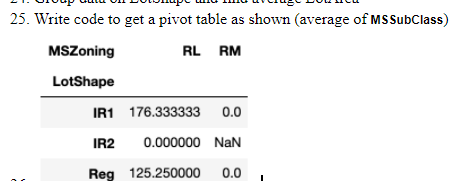

In [28]:
df.reset_index().pivot_table(values='MSSubClass', index='LotShape', columns='MSZoning', aggfunc='mean')

MSZoning,RL,RM
LotShape,,
IR1,43.333333,30.0
IR2,20.000000,NaN
Reg,43.333333,65.0
